Informática - 1º de Física - UMU
<br>
**Computación Científica**
<br>
<p style="color:#808080"> <small><small>
28/11/2018
</small></small></p>

## Procesos iterativos

En este capítulo vamos a explorar algunos procesos iterativos que presentan un comportamiento interesante. Nos servirań como excusa para repasar los bucles y las operaciones con arrays.

### Módulos necesarios

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Método de Newton

En la introducción del curso mostramos un método iterativo para calcular la raíz cuadrada. Se basaba en una idea intuitiva que funcionaba muy bien (hacer la media entre dos estimaciones). Pero cuando intentamos extenderla para calcular, por ejemplo, la raíz cúbica, el método converge mucho más lentamente.

In [2]:
N = 27
x = 1

for _ in range(10):
    x = (x + N/x**2)/2
    print(x)

14.0
7.0688775510204085
3.804606118073623
2.8349437604593346
3.0972227433212662
2.9559185053407466
3.0230317274669494
2.988746677335714
3.0056902981459395
2.9971709998261664


El [método de Newton](https://en.wikipedia.org/wiki/Newton%27s_method) nos dice cuál es la iteración óptima para resolver cualquier ecuación de la forma $f(x)=0$:

$$ x_{k+1} \leftarrow x_k - \frac{f(x)}{f'(x)}$$

La justificación es muy sencilla: en cada paso se encuentra la solución exacta a una aproximación lineal a $f(x)$. En la página de wikipedia hay una [animación](https://en.wikipedia.org/wiki/Newton%27s_method#Description) que lo explica muy bien.

Si la ecuación a resolver es $x^2 = N$, entonces $f(x) = x^2-N$ y $f'(x)=2x$, la expresión anterior es $x_{k+1} = (x_k + N/x_k)/2$. El método intuitivo era realmente el método de Newton.

Para la raíz cúbica tenemos $f(x) = x^3-N$ y $f'(x)=3x^2$, lo que da lugar a la regla $x_{k+1} \leftarrow (2 x_k + N/x_k^2 )/3$. Comprobamos que converge rápidamente:

In [3]:
N = 27
x = 1

for _ in range(10):
    x = (2*x + N/x**2)/3
    print(x)

9.666666666666666
6.540758356453956
4.570876778578707
3.4780192333867963
3.0626891086275365
3.001274406506175
3.0000005410641766
3.0000000000000977
3.0
3.0


Veamos otro ejemplo: resolvamos la ecuación de Kepler 

$$x - b \sin(x)=a$$

para $b=0.3$ y $a=0.4$.

In [4]:
a = 0.4
b = 0.3

def f(x):
    return x - b*np.sin(x) - a

def df(x):
    return 1 - b*np.cos(x)

x = 0.2

for _ in range(5):
    x = x - f(x)/df(x)
    print(x)

0.5677169175326992
0.5591441701817114
0.5591362566825313
0.559136256675849
0.559136256675849


La convergencia es muy rápida. Si en vez de aplicar el método de Newton hacemos una iteración "ingenua" obtenida al despejar una $x$ de la ecuación también funciona pero mucho más lentamente.

In [5]:
x = 0.2

for _ in range(10):
    x = a + b*np.sin(x)
    print(x)

0.4596007992385184
0.5330771100284857
0.5524557687874714
0.5574337761483312
0.558703061490786
0.5590260741122968
0.5591082347325373
0.5591291302386087
0.5591344443184703
0.5591357957675863


Si la ecuación a resolver es complicada es conveniente usar funciones de derivación simbólica o numérica, para no tener que hacerlo a mano. Las herramientas de cálculo científico tienen funciones especializadas para esta tarea. En un capítulo posterior veremos las que proporciona Python.

### Mandelbrot

Una cuestión importante en los métodos interativos es determinar los valores iniciales que consiguen una secuencia convergente.

Consideremos una iteración muy simple como la siguiente:

$$z_{k+1} = z_k^2 + C$$

donde $z_0 =0$, para diferentes valores de C.

In [6]:
C = 0.2

z = 0
for _ in range(10):
    z = z**2 + C
    print(z)

0.2
0.24000000000000002
0.25760000000000005
0.26635776000000005
0.27094645631221764
0.2734119821881485
0.2747541120040524
0.2754898220631354
0.275894642060378
0.2761178535176241


In [7]:
C = 1.3

z = 0
for _ in range(10):
    z = z**2 + C
    print(z)

1.3
2.99
10.240100000000002
106.15964801000003
11271.170865607102
127039293.98171036
1.6138982215371432e+16
2.604667469480754e+32
6.784292626571274e+64
4.602662644294935e+129


Con $C=0.2$ parece que la secuencia puede converger, o al menos no diverge, pero con $C=1.3$, claramente sí diverge.

No hay ningún problema en usar números complejos. De nuevo, dependiendo del valor de C la secuencia puede o no divergir.

In [8]:
C = 0.2 + 0.3j

z = 0
for _ in range(10):
    z = z**2 + C
    print(z)

(0.2+0.3j)
(0.15000000000000002+0.42j)
(0.04610000000000003+0.426j)
(0.02064921000000003+0.3392772j)
(0.08531737143378411+0.314011612302024j)
(0.10867576120785366+0.35358129072258637j)
(0.08679069192505628+0.37685143183626496j)
(0.06551562252778698+0.3654143930440352j)
(0.07076461815146282+0.3478807028817868j)
(0.08398664774459633+0.34923529020338423j)


In [9]:
C = 0.6 - 0.7j

z = 0
for _ in range(10):
    z = z**2 + C
    print(z)

(0.6-0.7j)
(0.47000000000000003-1.54j)
(-1.5507-2.1476j)
(-1.6075152700000008+5.960566640000001j)
(-32.34424932659772-19.8634037833052j)
(652.1956546424939+1284.2337688842154j)
(-1223896.601208005+1675142.667222876j)
(-1308180065101.4646-4100402833905.881j)
(-1.5101968317574507e+25+1.072813049240245e+25j)
(1.129766632030089e+50-3.240317736061336e+50j)


El [conjunto de Mandelbrot](https://en.wikipedia.org/wiki/Mandelbrot_set) es el conjunto números complejos $C$ para los que la iteración $z\leftarrow z^2+C$ no diverge.

Podemos programarlo de la siguiente forma. Para un número razonable de iteraciones, si en algún momento $|z| > 2$ seguro que va a divergir, por lo que inmediatamente el resultado es falso y termina la función. Si se completa el bucle es probable que el valor de $C$ de partida esté dentro del conjunto.

In [10]:
def mandel(c):
    z = 0
    for _ in range(30):
        z = z**2+c
        if abs(z) > 2:
            return False
    return True

In [11]:
mandel(-0.5+0.2j)

True

In [12]:
mandel(0.3+0.8j)

False

Para representarlo gráficamente evaluamos la función para todos los posibles valores de C en una región rectangular, con la resolución deseada. La función `imshow` permite representar matrices como imágenes, con diferentes "paletas" de color.

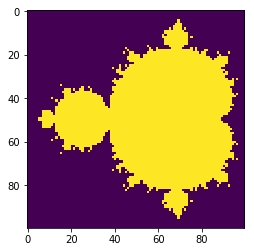

In [13]:
plt.imshow( [[mandel(x + y*1j) for x in np.linspace(-1.5,0.5,100)] for y in np.linspace(-1,1,100)]);

Queda más bonito si la gráfica muestra con diferentes colores el número de pasos realizados. De esta forma se observa lo cerca que está cada punto al conjunto de Mandelbrot.

In [14]:
def mandel(c):
    z = 0
    n = 0
    while abs(z) < 2 and n < 30:
        n += 1
        z = z**2+c
    return n

In [15]:
mandel(0.5)

5

In [16]:
mandel(-0.2+0.3j)

30

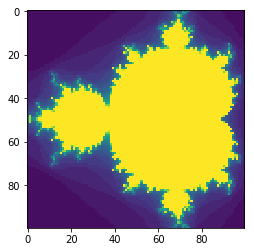

In [17]:
plt.imshow( [[mandel(x + y*1j) for x in np.linspace(-1.5,0.5,100)] for y in np.linspace(-1,1,100)]);

Si queremos una imagen de mayor resolución el tiempo de cálculo empieza a ser apreciable.

Para que el cómputo sea más eficiente, en vez de usar las operaciones normales de Python que operan sobre números individuales es preferible usar operaciones aritméticas sobre arrays de `numpy`. Realizaremos cada paso de iteración para todos los C "a la vez".

Para crear una matriz con todos los valores de C podemos hacer lo siguiente. Definimos el rango de valores que queremos visualizar en cada eje (centrado en la posición deseada y con un cierto ancho D) y luego formamos un array a partir de una lista de listas.

In [18]:
%%time

n = 1000

centro = -0.5; D=1
#c = -0.5+0.6j; D = 0.2

rx = np.linspace(centro.real-D,centro.real+D,n)
ry = np.linspace(centro.imag-D,centro.imag+D,n)[::-1]

C = np.array([[x+y*1j for x in rx] for y in ry])

CPU times: user 10.3 s, sys: 224 ms, total: 10.5 s
Wall time: 10.8 s


La operación es muy lenta. La lista de listas contiene un millón del elementos que hay que crear uno por uno. Es mucho más rápido fabricar la matriz C de forma directa usando la función `meshgrid`, que explicamos al final del notebook.

In [19]:
%%time

n = 1000

centro = -0.5; D=1
#c = -0.5+0.6j; D = 0.2

rx = np.linspace(centro.real-D,centro.real+D,n)
ry = np.linspace(centro.imag-D,centro.imag+D,n)[::-1]
x,y = np.meshgrid(rx,ry)
C = x+y*1j

CPU times: user 228 ms, sys: 115 ms, total: 343 ms
Wall time: 361 ms


Ahora podemos aplicar la iteración a todos los puntos de partida y mostrar los que no divergen.

/srv/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.
/srv/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in square
  after removing the cwd from sys.path.
/srv/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less
  import sys


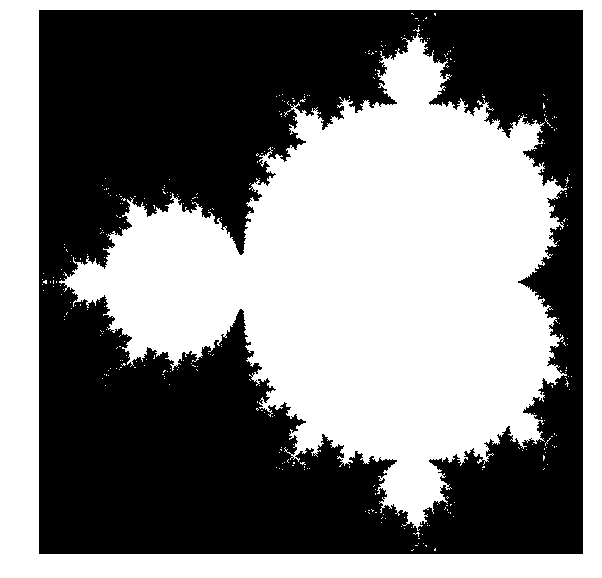

In [20]:
Z = np.zeros([n,n])

for k in range(30):
    Z = Z**2 + C

plt.figure(figsize=(10,10))
plt.imshow( abs(Z)<2, 'gray'); plt.axis('off');

Se producen avisos ("warnings") indicando que se ha producido un "overflow" en algunos elementos. Son magnitudes mayores que la capacidad del tipo `float`. Para evitarlo usaremos una "máscara" S (una matriz de valores lógicos), que indicará los elementos que se mantienen acotados. Esto nos permitirá también fabricar fácilmente el gráfico con colores según el número de iteraciones. Para ello usaremos una matriz N que irá contando en cada posición los pasos realizados. Observa que las operaciones de iteración en Z y de incremento de N se efectúan solo en las posiciones donde la máscara S es verdadera.

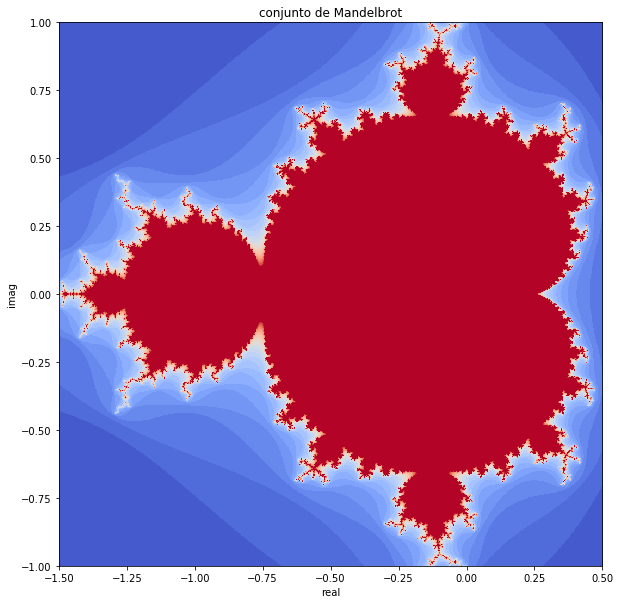

In [21]:
Z = np.zeros([n,n],complex)
N = np.zeros([n,n])

for k in range(30):
    S = abs(Z) < 2
    Z[S] = (Z**2 + C)[S]
    N[S] += 1

plt.figure(figsize=(10,10))
plt.imshow(N, 'coolwarm', extent=[rx[0],rx[-1],ry[-1],ry[0]]);
plt.title('conjunto de Mandelbrot'); plt.xlabel('real'); plt.ylabel('imag');

Un ejercicio interesante es definir una función que crea la imagen del conjunto de mandelbrot en una posición y zoom deseados y usarla para hacer una animación.

### Cuencas de atracción

Más arriba hemos resuelto $x^3=N$ en el dominio real y hemos visto que el método de Newton converge rápidamente a la solución. Resulta interesante investigar los puntos de partida que convergen a cada una de las soluciones de la sencilla ecuación $z^3=1$ en el dominio complejo.

Las soluciones se reparten en el círculo unidad:

In [22]:
z1 = np.exp(1j * 0*2*np.pi/3)
z2 = np.exp(1j * 1*2*np.pi/3)
z3 = np.exp(1j * 2*2*np.pi/3)
print(z1,z2,z3)

(1+0j) (-0.4999999999999998+0.8660254037844387j) (-0.5000000000000004-0.8660254037844384j)


Podría pensarse que el metodo de Newton converge a la solución más próxima al punto de partida. Comprobémoslo. Generamos una matriz con una malla de puntos de partida para aplicar el método con todos los elementos a la vez usando operaciones sobre arrays.

In [23]:
n = 1000
r = np.linspace(-1,1,n)
x0,y0 = np.meshgrid(r,r)
z0 = x0+y0*1j

In [24]:
def cube(z):
    return z**3-1

def dcube(z):
    return 3*z**2

In [25]:
%%time

Z = z0

for k in range(10):
    Z = Z - cube(Z)/dcube(Z)

CPU times: user 1.36 s, sys: 513 ms, total: 1.87 s
Wall time: 1.99 s


Para dibujar la cuenca fabricamos máscaras que indican los elementos que al final de la iteración están más cerca de cada raíz. Estas máscaras nos permiten asignar colores (con la codificación RGB, Red Green Blue) a la matriz mapa, para mostrar las diferentes regiones con `imshow`.

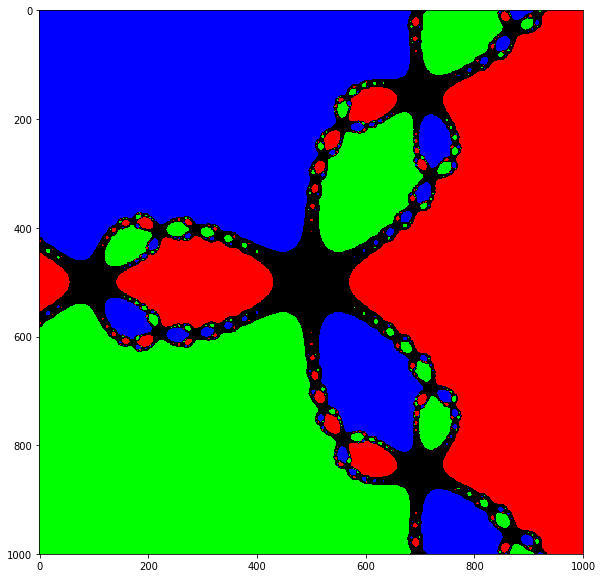

In [26]:
eps = 1e-3

m1 = abs(Z-z1) < eps
m2 = abs(Z-z2) < eps
m3 = abs(Z-z3) < eps

mapa = np.zeros([n,n,3])

mapa[m1] = (1,0,0)
mapa[m2] = (0,1,0)
mapa[m3] = (0,0,1)

plt.figure(figsize=(10,10))
plt.imshow(mapa);

Las cuencas de convergencia a cada solución tienen una frontera muy compleja ([Newton fractal](https://en.wikipedia.org/wiki/Newton_fractal)).

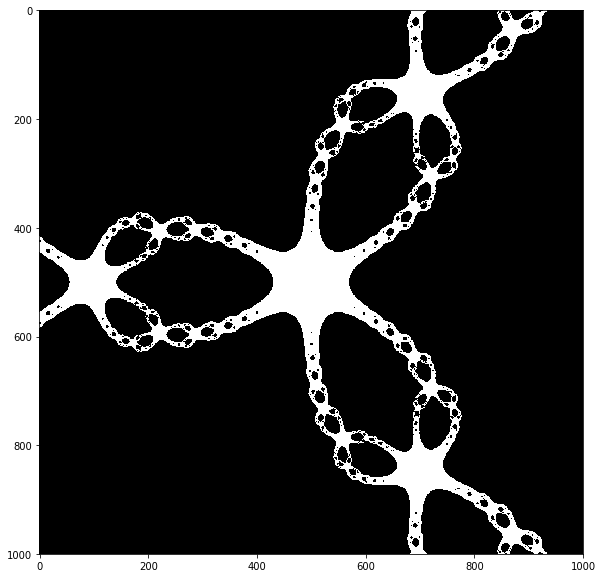

In [27]:
plt.figure(figsize=(10,10))
plt.imshow(~(m1 | m2 | m3), 'gray');

Aquí hay un interesante [blog post](http://www.investigacionyciencia.es/blogs/matematicas/33/posts/derivadas-y-fractales-de-newton-11288) sobre este tema.

### meshgrid *

Considera el producto cartesiano de dos contenedores:

In [28]:
[(x,y) for x in [1,2,3,4] for y in [10,20,30] ]

[(1, 10),
 (1, 20),
 (1, 30),
 (2, 10),
 (2, 20),
 (2, 30),
 (3, 10),
 (3, 20),
 (3, 30),
 (4, 10),
 (4, 20),
 (4, 30)]

Podemos expresarlo como una lista de listas, similar a una matriz.

In [29]:
[[(x,y) for x in [1,2,3,4]] for y in [10,20,30] ]

[[(1, 10), (2, 10), (3, 10), (4, 10)],
 [(1, 20), (2, 20), (3, 20), (4, 20)],
 [(1, 30), (2, 30), (3, 30), (4, 30)]]

La función `meshgrid` de `numpy` fabrica un producto cartesiano de forma muy eficiente, pero nos da los elementos por separado:

In [30]:
x,y = np.meshgrid([1,2,3,4],[10,20,30])

In [31]:
x

array([[1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4]])

In [32]:
y

array([[10, 10, 10, 10],
       [20, 20, 20, 20],
       [30, 30, 30, 30]])

Esto tiene múltiples aplicaciones. Permite dibujar superficies 3D, o, como hemos visto más arriba, preparar un conjunto de valores C para el conjunto de Mandelbrot o de valores iniciales para el método de Newton.

In [33]:
x+y*1j

array([[1.+10.j, 2.+10.j, 3.+10.j, 4.+10.j],
       [1.+20.j, 2.+20.j, 3.+20.j, 4.+20.j],
       [1.+30.j, 2.+30.j, 3.+30.j, 4.+30.j]])

### Autómata celular

Un proceso iterativo que se hizo muy famoso es el [Game of Life](https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life).
Se trata de un conjunto de células dispuestas en una parrilla bidimensional, cada una de las cuales se encuentra en cada momento en un estado "vivo" o "muerto". El tiempo avanza en pasos discretos y en cada instante una célula puede nacer, continuar viviendo, o morir, dependiendo del número de células vivas que hay en su entorno. Los parámetros típicos que producen un comportamiento interesante son los siguientes: una célula nace en un sitio si en su entorno hay 3 vecinos; una célula muere si en su entorno hay menos de 2 (está muy sola) o más de 3 vecinos (no hay alimento para todas). 

La implementación tradicional es la siguiente, basada en 4 bucles anidados. El estado siguiente se irá guardando en un array auxiliar `r`. Para evitar que los bordes del mundo sean posiciones especiales, vamos a trabajar con un mundo ilimitado "toroidal" o cíclico que se cierra sobre sí mismo. Esto se programa muy fácilmente tomando el resto de la división de las coordenadas entre el número de celdas en cada dimensión.

In [34]:
import numpy as np

s1 = 2; s2 = 3
n1 = 3; n2 = 3

def life(w):
    n,m = w.shape
    r = np.empty_like(w)
    for i in range(n):
        for j in range(m):
            v = 0
            for k in [-1,0,1]:
                for l in [-1,0,1]:
                    if w[(i+k)%n, (j+l)%n]:
                        v += 1
            if w[i,j]:
                v -= 1
                r[i,j] = s1 <= v <= s2
            else:
                r[i,j] = n1 <= v <= n2
    return r

Creamos una animación partiendo de una configuración aleatoria, pero borrando la zona superior izquierda para meter un "glider".

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import animation, rc
rc('animation', html='html5')

In [36]:
n = 50
x = 1*(np.random.rand(n,n) > 0.6);

x[:25,:25] = 0
x[5:8,5:8] = [[0,1,0],
              [0,0,1],
              [1,1,1]]


fig, ax = plt.subplots(figsize=(5,5))
plt.close();

img = ax.imshow(1-x,'gray')

def animate(k):
    global x
    img.set_data(1-x)
    x = life(x)
    return [img]

fps=10
T = 5
animation.FuncAnimation(fig, animate, init_func=lambda:[], frames=T*fps, interval=1000/fps, blit=True, repeat=False)

Es curioso que una regla tan sencilla dé lugar a configuraciones de células con comportamientos no triviales (osciladores, estructuras caminantes, cañones que disparan proyectiles, etc.). De hecho, es posible simular cualquier computación con un autómata celular.

En lenguajes "compilados" como Fortran o C una definición como la anterior sería muy eficiente. Pero en lenguajes "interpretados" como Python o R es mucho mejor evitar los bucles explícitos y utilizar operaciones sobre arrays en bloque que están optimizadas.

En un "mundo" más grande de $400^2$ celdas la definición anterior necesita aproximadamente 1s para calcular un paso de evolución (depende del ordenador).

In [37]:
n = 400
x = 1*(np.random.rand(n,n) > 0.6);

In [38]:
%%time

for _ in range(10):
    x = life(x)

CPU times: user 14.9 s, sys: 0 ns, total: 14.9 s
Wall time: 15.4 s


Una implementación alternativa con operaciones de `numpy` es la siguiente. La idea es calcular los vecinos creando un array 3D con los 8 desplazamientos en las dos direcciones de modo que sumando los elementos a lo largo del eje adecuado conseguimos el número de vecinos de cada celda. Finalmente creamos el resultado con operaciones lógicas elemento a elemento.

In [39]:
def vecinos(w):
    return np.array([np.roll(np.roll(w,k,axis=1),l,axis=0)
                     for k in [-1,0,1] 
                     for l in [-1,0,1] if (k,l) != (0,0) ]
                   ).sum(axis=0)

def life_a(w):
    v = vecinos(w)
    return np.where(w, (s1 <=v)&(v<=s2) , (n1<=v)&(v<=n2) )

Comprobamos que esta definición es equivalente a la anterior:

In [40]:
np.all(life(x) == life_a(x))

True

Pero es más de 200 veces más rápida.

In [41]:
%%time

for _ in range(10*200):
    x = life_a(x)

CPU times: user 5.69 s, sys: 0 ns, total: 5.69 s
Wall time: 5.73 s
